<a href="https://colab.research.google.com/github/yasarsultan/Ecommerce-Data-Analysis/blob/main/Yasar_Sultan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Exploring Customers Dataset**

In [ ]:
# Exploring and Cleaning
customers_df = pd.read_csv("Customers.csv")

print("Customers Data Preview:")
print(customers_df.head())

customers_df.dropna(inplace=True)
customers_df.drop_duplicates(inplace=True)
print("\nMissing Values in Customers:")
print(customers_df.isnull().sum())

customers_df["CustomerID"] = customers_df["CustomerID"].astype(str)
customers_df["CustomerName"] = customers_df["CustomerName"].astype(str)
customers_df["Region"] = customers_df["Region"].astype(str)
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"], errors='coerce')

print("\nCustomers Dataset Info:")
print(customers_df.info())
print("\nCustomers Dataset Summary:")
print(customers_df.describe(include='all'))

Customers Data Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Custome

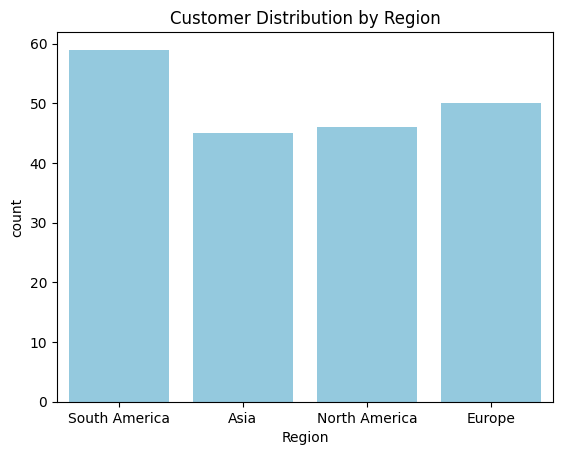

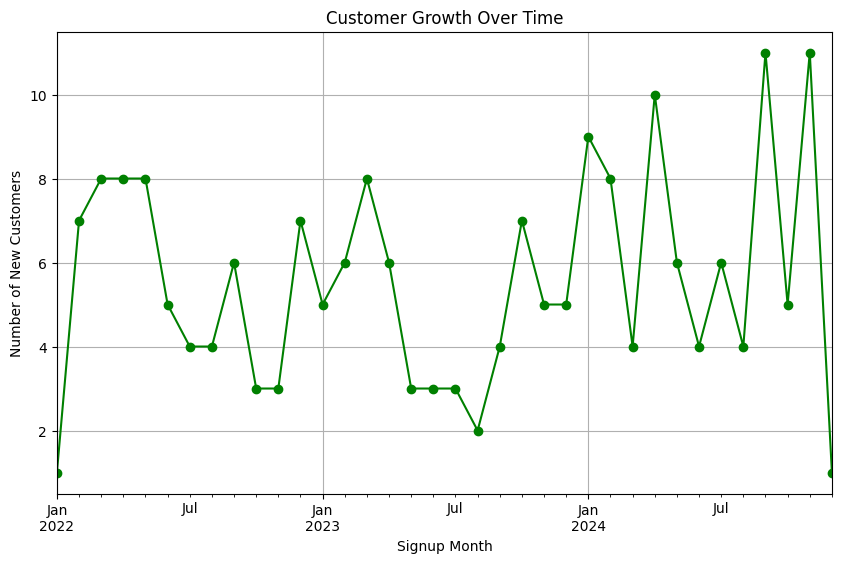

In [ ]:
# Visualizing Customer Data
sns.countplot(x='Region', data=customers_df, color='skyblue')
plt.title("Customer Distribution by Region")
plt.show()

customers_df["SignupMonth"] = customers_df['SignupDate'].dt.to_period('M')
customer_growth = customers_df.groupby("SignupMonth")["CustomerID"].count()
customer_growth.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title("Customer Growth Over Time")
plt.xlabel("Signup Month")
plt.ylabel("Number of New Customers")
plt.grid()
plt.show()

## **Exploring Products Dataset**

In [ ]:
# Exploring and Cleaning
products_df = pd.read_csv("Products.csv")

print("Products Data Preview:")
print(products_df.head())

products_df.dropna(inplace=True)
products_df.drop_duplicates(inplace=True)
print("\nMissing values in Products:")
print(products_df.isnull().sum())

products_df["ProductID"] = products_df["ProductID"].astype(str)
products_df["ProductName"] = products_df["ProductName"].astype(str)
products_df["Category"] = products_df["Category"].astype(str)
products_df["Price"] = pd.to_numeric(products_df["Price"], errors='coerce')


print("\nProducts Dataset Info:")
print(products_df.info())
print("\nProducts Dataset Summary:")
print(products_df.describe(include='all'))

print("\nNumber of Products Available:", end=" ")
print(products_df["ProductID"].nunique())

Products Data Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Products Dataset Summary:
       ProductID            ProductName Category       P

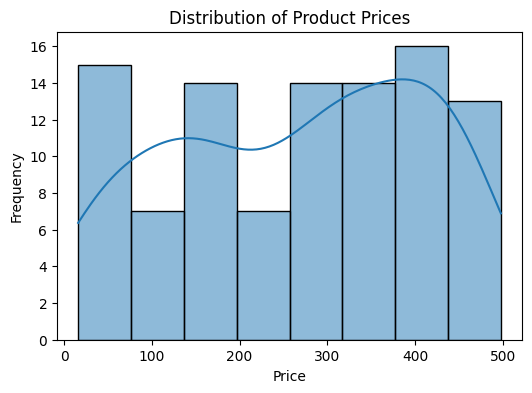

Text(0.5, 0, 'Count')

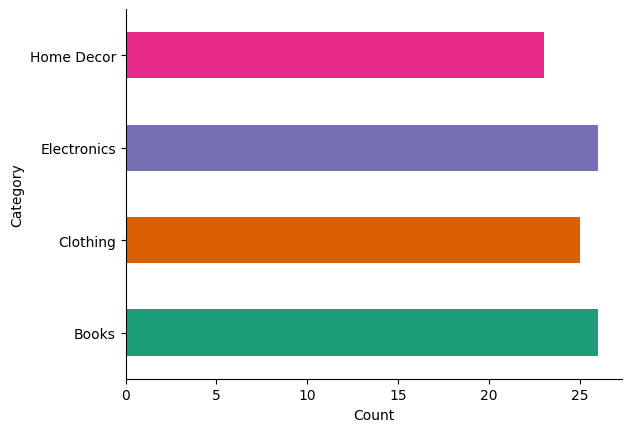

In [ ]:
# Visualizing
plt.figure(figsize=(6,4))
sns.histplot(products_df['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

products_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel("Category")
plt.xlabel("Count")

## **Exploring Transactions Data**

In [ ]:
# Exploring and Cleaning
transactions_df = pd.read_csv("Transactions.csv")

print("Transactions Data Preview:")
print(transactions_df.head())

transactions_df.dropna(inplace=True)
transactions_df.drop_duplicates(inplace=True)
print("\nMissing values in Transactions Dataset:")
print(transactions_df.isnull().sum())

transactions_df["TransactionID"] = transactions_df["TransactionID"].astype(str)
transactions_df["CustomerID"] = transactions_df["CustomerID"].astype(str)
transactions_df["ProductID"] = transactions_df["ProductID"].astype(str)
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"], errors="coerce")
transactions_df["Quantity"] = pd.to_numeric(transactions_df["Quantity"], errors='coerce')
transactions_df["TotalValue"] = pd.to_numeric(transactions_df["TotalValue"], errors='coerce')
transactions_df["Price"] = pd.to_numeric(transactions_df["Price"], errors='coerce')

print("\nTransactions Dataset Info:")
print(transactions_df.info())
print("\nTransactions Dataset Summary:")
print(transactions_df.describe(include='all'))

print("\nTotal Number of Transactions:", end=" ")
print(transactions_df["TransactionID"].nunique())

print("\nTotal Revenue:", end=" ")
print(transactions_df["TotalValue"].sum())

print("\nTop 5 Products by Quantity Sold:")
print(transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head())

print("\nTop 5 Customers by Total Spending:")
print(transactions_df.groupby("CustomerID")['TotalValue'].sum().sort_values(ascending=False).head())

Transactions Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Missing values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------    

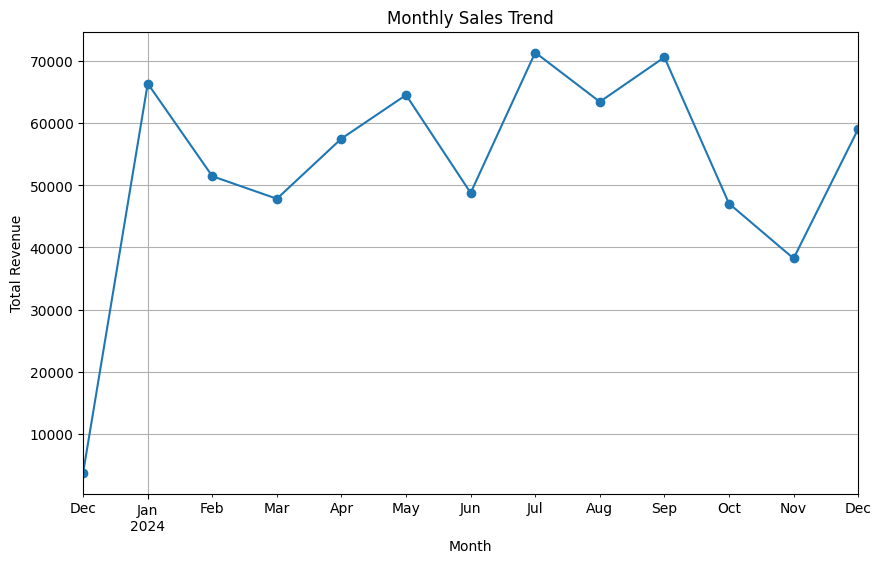

In [ ]:
transactions_df["TransactionMonth"] = transactions_df["TransactionDate"].dt.to_period('M')
monthly_sales = transactions_df.groupby("TransactionMonth")["TotalValue"].sum()
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

# **Extracting Insights from Ecommerce Dataset**

**Merging all Datasets**

In [ ]:
# Removing price column from Transactions dataset
transactions = transactions_df.drop(columns=["Price"])

# Merging
merged_df = transactions.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,TransactionMonth,CustomerName,Region,SignupDate,SignupMonth,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,2024-08,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,2024-05,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,2024-04,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,2024-03,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,2024-03,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
print("Top 10 Customers by Spending:")
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

print("\nTop 10 Products by Quantity Sold:")
top_products = merged_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Top 10 Customers by Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Top 10 Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


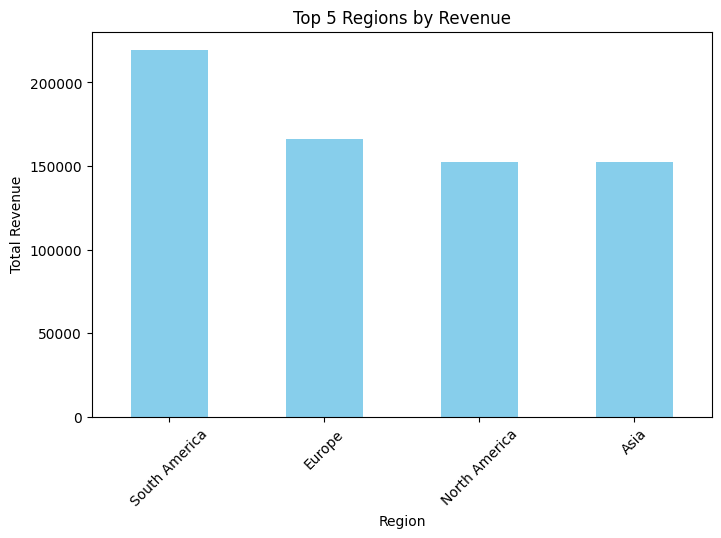

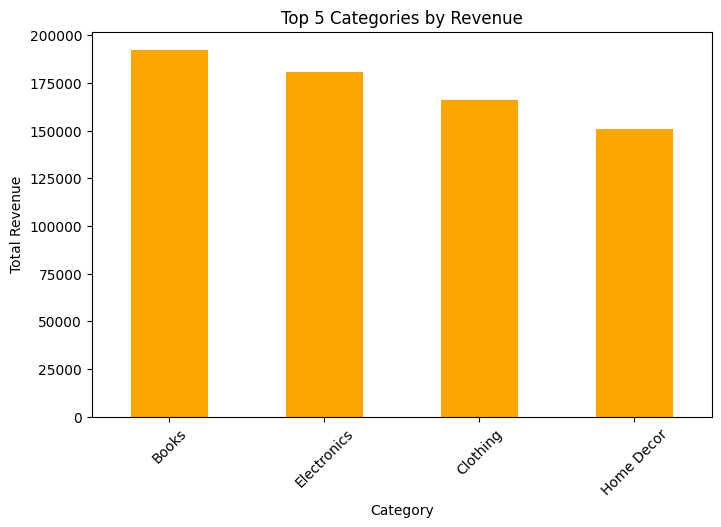

In [ ]:
# Visualizing merged dataset
region_revenue = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_revenue.head().plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Top 5 Regions by Revenue")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

category_revenue = merged_df.groupby("Category")['TotalValue'].sum().sort_values(ascending=False)
category_revenue.head().plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Top 5 Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

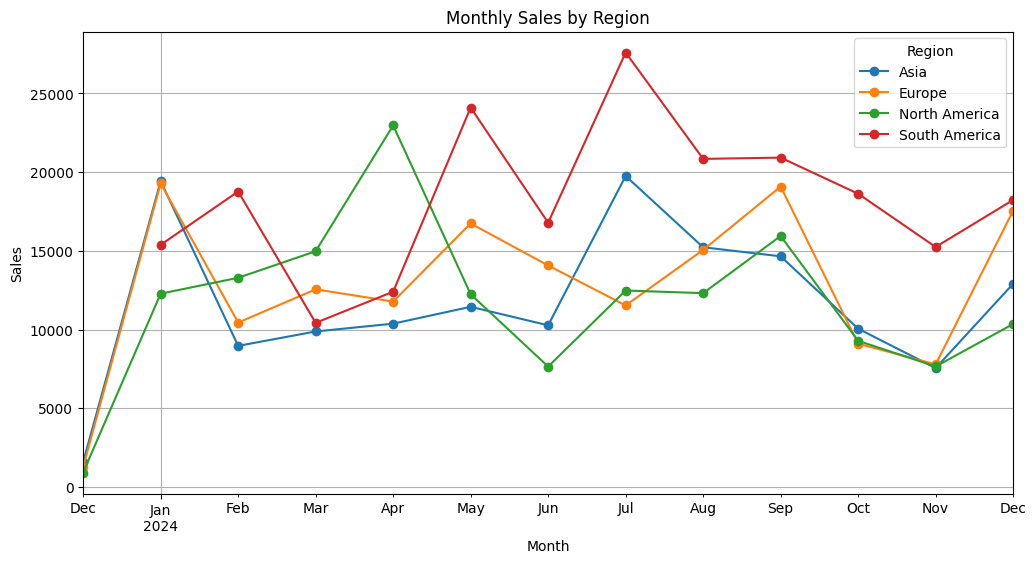

In [ ]:
region_monthly_revenue = merged_df.groupby(["Region", "TransactionMonth"])['TotalValue'].sum().unstack('Region')
region_monthly_revenue.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales by Region")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()

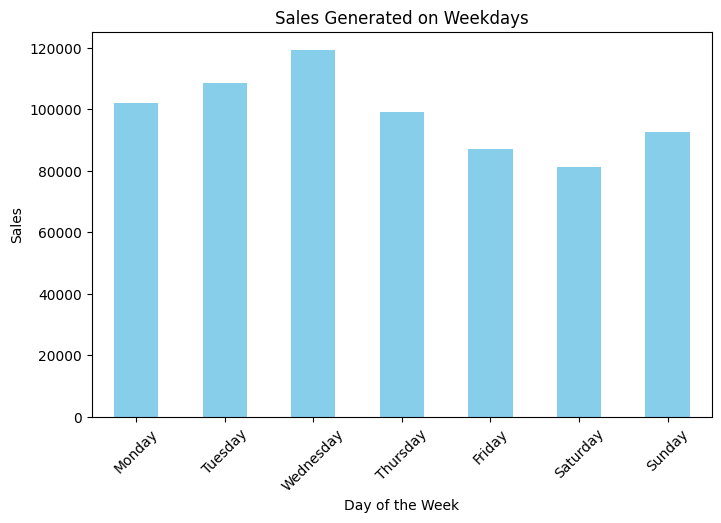

In [ ]:
merged_df["TransactionDay"] = merged_df['TransactionDate'].dt.day_name()
weekday_revenue = merged_df.groupby('TransactionDay')['TotalValue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_revenue.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Sales Generated on Weekdays")
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()